/opt/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 30 (9.70873786407767%)


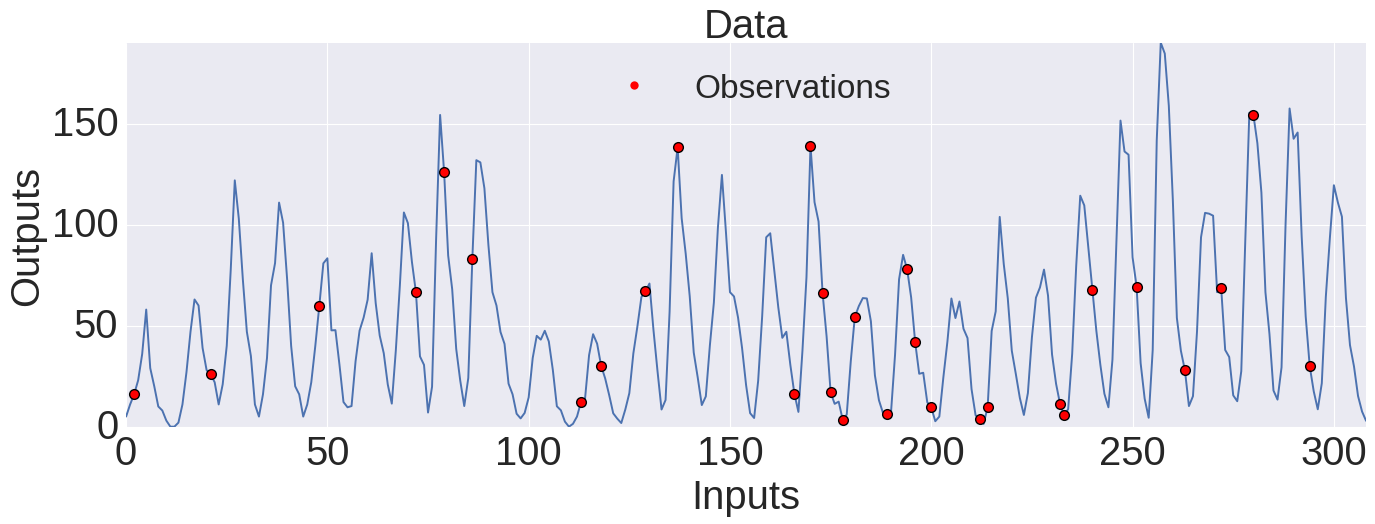

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3
import theano as th

th.config.warn_float64 = 'raise'

g3.style_big_seaborn()
g3.style_widget()

x, y = g3.data_sunspots()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.1)

# Gaussian Processes

'Starting function value (-logp): 157.653'


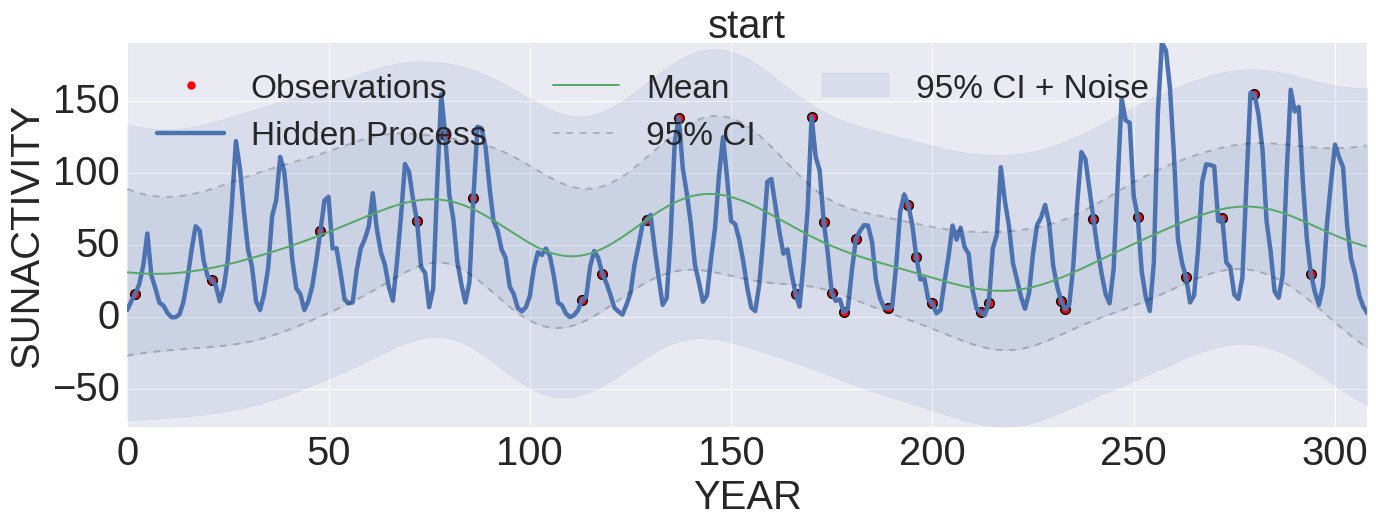

'start_bfgs'
         Current function value: 155.434586
         Iterations: 20
         Function evaluations: 103
         Gradient evaluations: 91


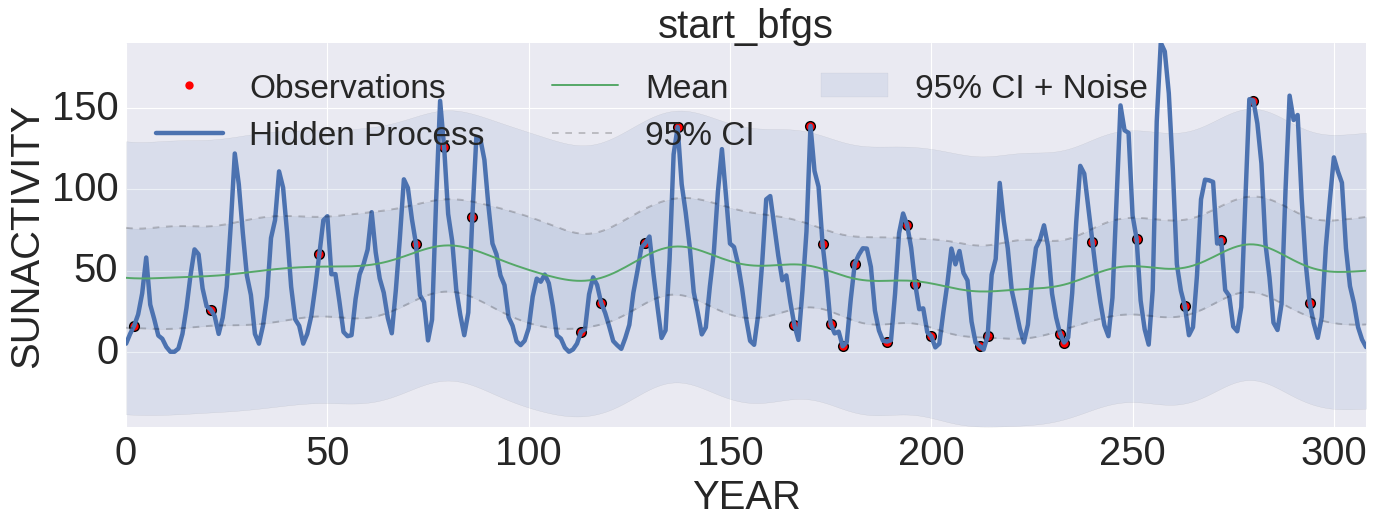

'start_powell'
Optimization terminated successfully.
         Current function value: 153.040894
         Iterations: 10
         Function evaluations: 595


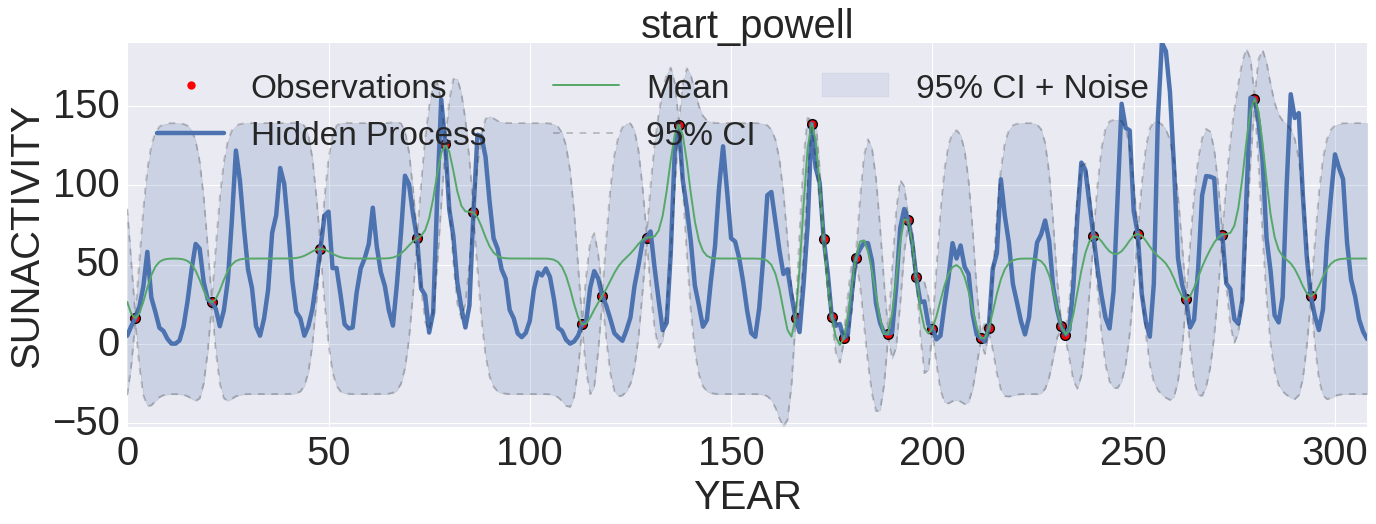

'find_MAP'
{'GP_Bias_Bias': array(53.777584075927734, dtype=float32),
 'GP_Noise_var_log_': array(0.3480547070503235, dtype=float32),
 'GP_SE_rate_log_': array([-0.9166761], dtype=float32),
 'GP_SE_var_log_': array(7.553646087646484, dtype=float32)}


In [3]:
gp = g3.GaussianProcess(x, g3.Bias(), g3.SE(x))
gp.describe('Sunspots', 'YEAR', 'SUNACTIVITY')
gp.set_space(x, hidden=y)
gp.observed(x_obs, y_obs)
p = gp.find_MAP(start=None, points=2, plot=True)

# Student-t Processes

r1 __str__ = -0.8902489542961121
r2 __str__ = -0.7392648458480835
r3 __str__ = -0.6449083089828491
det_m __str__ = -0.3465735912322998
det_m __str__ = -1.732867956161499
r1 __str__ = -0.9840160012245178
r2 __str__ = -0.7392648458480835
r3 __str__ = 0.8014175891876221
det_m __str__ = -1.732867956161499
r1 __str__ = -0.9840160012245178
r2 __str__ = -0.7392648458480835
r3 __str__ = 0.8014175891876221
det_m __str__ = -1.732867956161499
det_m __str__ = 14.398658752441406
r1 __str__ = -89.36627960205078
r2 __str__ = 12.22758674621582
r3 __str__ = -122.17189025878906


array(-184.91192626953125, dtype=float32)

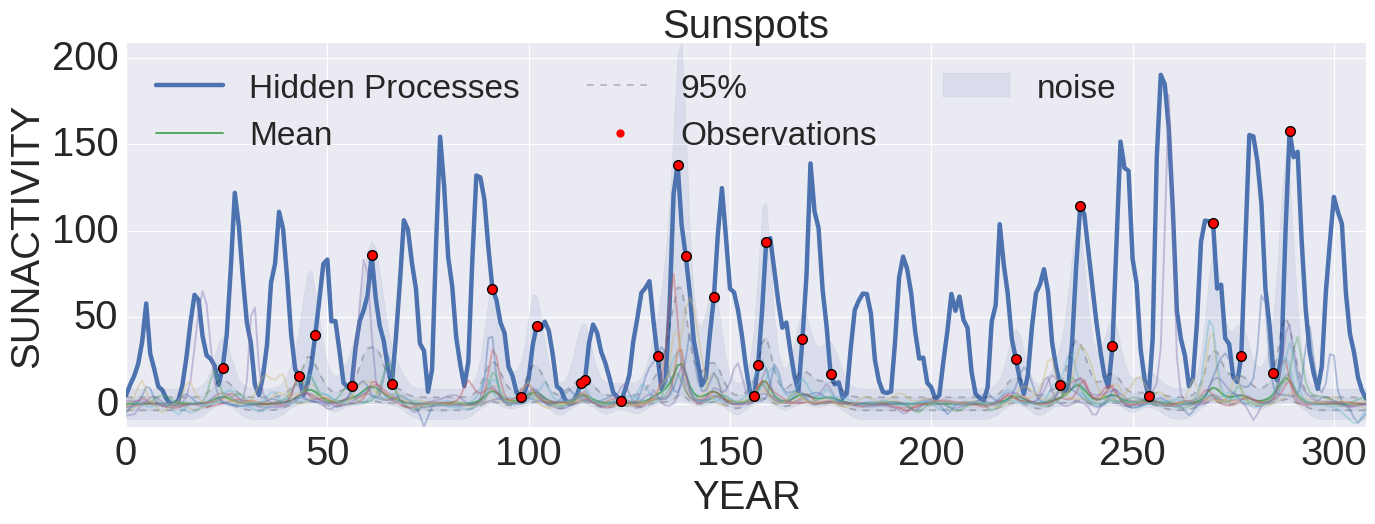

In [91]:
tp = g3.WarpedStudentTProcess(x, g3.Bias(), g3.SE(x), g3.ArcsinhLinear())
tp.describe('Sunspots','YEAR','SUNACTIVITY')
tp.set_space(x, hidden=y)
tp.observed(x_obs, y_obs)

params = tp.params_default
params['WTP_SE_rate_log_'] += 2
tp.plot(params, samples=10)
#g3.plot_save('images/tp_sunspots0.pdf')
tp.logp(params)

In [92]:
tp.logp(tp.params_default)

det_m __str__ = 14.398658752441406
r1 __str__ = -77.8501205444336
r2 __str__ = 12.22758674621582
r3 __str__ = -118.7275161743164


array(-169.95138549804688, dtype=float32)

det_m __str__ = 14.398658752441406
r1 __str__ = -77.8501205444336
r2 __str__ = 12.22758674621582
r3 __str__ = -118.7275161743164
det_m __str__ = 14.398658752441406
r1 __str__ = -77.8501205444336
r2 __str__ = 12.22758674621582
r3 __str__ = -118.7275161743164
'Starting function value (-logp): 169.951'


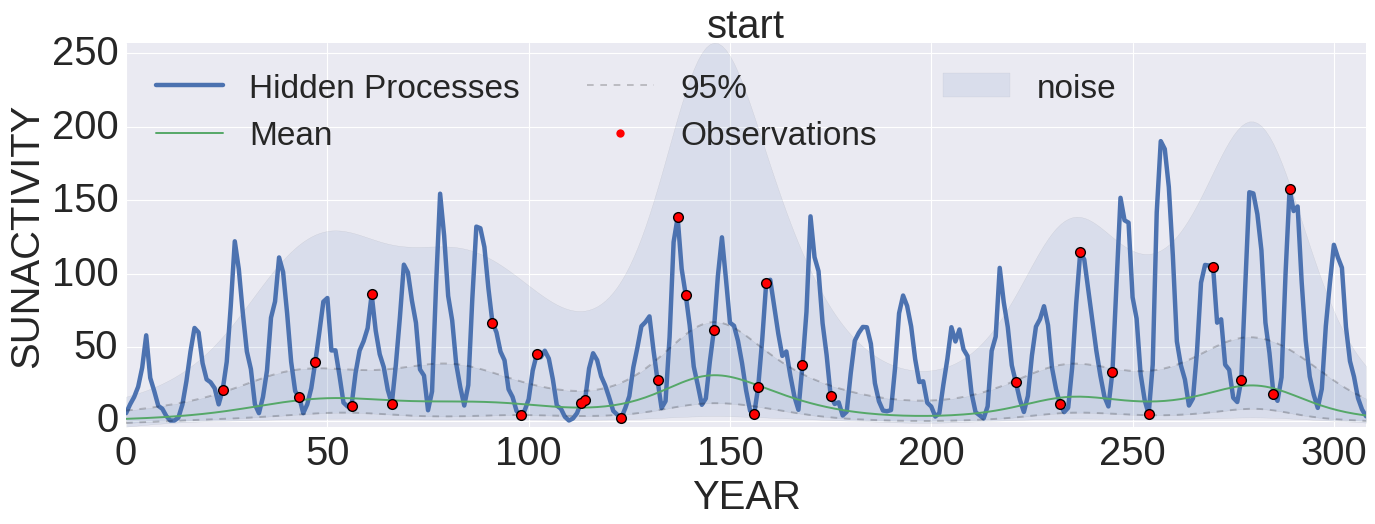

'start_bfgs'
det_m __str__ = 14.398658752441406
det_m __str__ = 14.398658752441406
r1 __str__ = -77.8501205444336
r2 __str__ = 12.22758674621582
r3 __str__ = -118.7275161743164
det_m __str__ = 7.500679016113281
r1 __str__ = -65.23123168945312
r2 __str__ = 11.80909252166748
r3 __str__ = -113.63565826416016
det_m __str__ = 7.500679016113281
det_m __str__ = -28.185768127441406
r1 __str__ = -14.282155990600586
r2 __str__ = 5.8068132400512695
r3 __str__ = -119.1177978515625
det_m __str__ = -28.185768127441406
det_m __str__ = -11.123611450195312
r1 __str__ = -34.93118667602539
r2 __str__ = 8.641630172729492
r3 __str__ = -115.18473052978516
det_m __str__ = -11.123611450195312
det_m __str__ = 30.494178771972656
r1 __str__ = -84.92170715332031
r2 __str__ = 6.504217624664307
r3 __str__ = -104.5583724975586
det_m __str__ = 30.494178771972656
det_m __str__ = 28.837860107421875
r1 __str__ = -83.24600219726562
r2 __str__ = 6.673308849334717
r3 __str__ = -104.5150375366211
det_m __str__ = 28.83786010

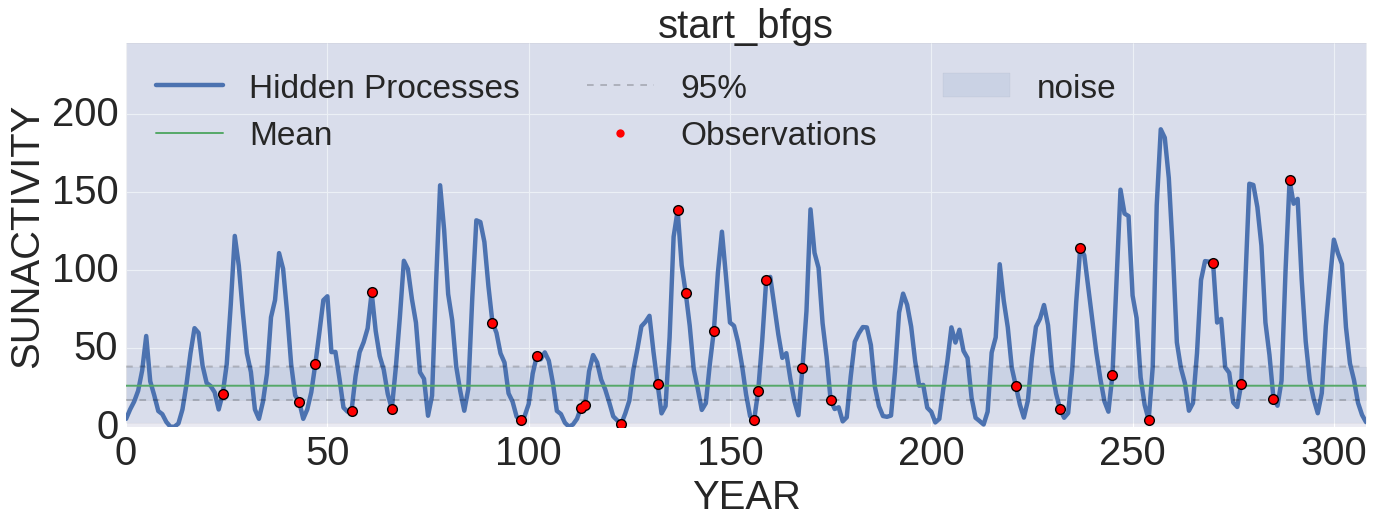

'start_powell'
det_m __str__ = 14.398658752441406
r1 __str__ = -77.8501205444336
r2 __str__ = 12.22758674621582
r3 __str__ = -118.7275161743164
det_m __str__ = 14.398658752441406
r1 __str__ = -77.8501205444336
r2 __str__ = 12.22758674621582
r3 __str__ = -118.7275161743164
det_m __str__ = 14.398658752441406
r1 __str__ = -64.80894470214844
r2 __str__ = -0.6789681911468506
r3 __str__ = -118.7275161743164
det_m __str__ = 14.398658752441406
r1 __str__ = -50.45488739013672
r2 __str__ = -16.65627670288086
r3 __str__ = -118.7275161743164
det_m __str__ = 14.398658752441406
r1 __str__ = -64.80894470214844
r2 __str__ = -0.6789681911468506
r3 __str__ = -118.7275161743164
det_m __str__ = 14.398658752441406
r1 __str__ = -58.076820373535156
r2 __str__ = -7.660606384277344
r3 __str__ = -118.7275161743164
det_m __str__ = 14.398658752441406
r1 __str__ = -69.5347671508789
r2 __str__ = 4.056575775146484
r3 __str__ = -118.7275161743164
det_m __str__ = 14.398658752441406
r1 __str__ = -67.54280090332031
r2 _

r1 __str__ = -39.665287017822266
r2 __str__ = 20.46857261657715
r3 __str__ = -110.70831298828125
det_m __str__ = -15.046066284179688
r1 __str__ = -39.858158111572266
r2 __str__ = 20.661418914794922
r3 __str__ = -110.70831298828125
det_m __str__ = -15.046066284179688
r1 __str__ = -39.665287017822266
r2 __str__ = 20.46857261657715
r3 __str__ = -110.70831298828125
det_m __str__ = 14.953933715820312
r1 __str__ = -99.98112487792969
r2 __str__ = 20.46857261657715
r3 __str__ = -110.70831298828125
det_m __str__ = -63.58708190917969
r1 __str__ = -72.42639923095703
r2 __str__ = 20.46857261657715
r3 __str__ = -110.70831298828125
det_m __str__ = -15.046066284179688
r1 __str__ = -39.665287017822266
r2 __str__ = 20.46857261657715
r3 __str__ = -110.70831298828125
det_m __str__ = -33.58708190917969
r1 __str__ = -56.33694839477539
r2 __str__ = 20.46857261657715
r3 __str__ = -110.70831298828125
det_m __str__ = -3.5870819091796875
r1 __str__ = -64.25149536132812
r2 __str__ = 20.46857261657715
r3 __str__ 

r2 __str__ = 20.46857261657715
r3 __str__ = -108.92253112792969
det_m __str__ = -15.015556335449219
r1 __str__ = -63.70613098144531
r2 __str__ = 40.224815368652344
r3 __str__ = -107.13677978515625
det_m __str__ = -15.030807495117188
r1 __str__ = -41.45779037475586
r2 __str__ = 20.46857261657715
r3 __str__ = -108.92253112792969
det_m __str__ = -15.015556335449219
r1 __str__ = -63.70613098144531
r2 __str__ = 40.224815368652344
r3 __str__ = -107.13677978515625
det_m __str__ = -15.055496215820312
r1 __str__ = -13.496957778930664
r2 __str__ = -7.55134916305542
r3 __str__ = -111.81198120117188
det_m __str__ = -15.030807495117188
r1 __str__ = -41.45779037475586
r2 __str__ = 20.46857261657715
r3 __str__ = -108.92253112792969
det_m __str__ = -15.040237426757812
r1 __str__ = -29.013458251953125
r2 __str__ = 8.8793306350708
r3 __str__ = -110.02619934082031
det_m __str__ = -15.024978637695312
r1 __str__ = -49.75041961669922
r2 __str__ = 27.918188095092773
r3 __str__ = -108.24043273925781
det_m __s

det_m __str__ = -15.015396118164062
r1 __str__ = -41.11933898925781
r2 __str__ = 18.609573364257812
r3 __str__ = -107.40176391601562
det_m __str__ = -15.015396118164062
r1 __str__ = -41.11933898925781
r2 __str__ = 18.609573364257812
r3 __str__ = -107.40176391601562
det_m __str__ = -15.015396118164062
r1 __str__ = -41.11933898925781
r2 __str__ = 18.609573364257812
r3 __str__ = -107.40176391601562
det_m __str__ = -15.015396118164062
r1 __str__ = -41.11933898925781
r2 __str__ = 18.609573364257812
r3 __str__ = -107.40176391601562
det_m __str__ = -15.015396118164062
r1 __str__ = -41.11933898925781
r2 __str__ = 18.609573364257812
r3 __str__ = -107.40176391601562
det_m __str__ = -15.015396118164062
r1 __str__ = -41.11933898925781
r2 __str__ = 18.609573364257812
r3 __str__ = -107.40176391601562
det_m __str__ = -15.015396118164062
r1 __str__ = -41.11933898925781
r2 __str__ = 18.609573364257812
r3 __str__ = -107.40176391601562
det_m __str__ = -15.015396118164062
r1 __str__ = -41.11933898925781
r

det_m __str__ = -14.912452697753906
r1 __str__ = -33.4139404296875
r2 __str__ = 8.244917869567871
r3 __str__ = -104.81672668457031
det_m __str__ = -14.905479431152344
r1 __str__ = -33.42087173461914
r2 __str__ = 8.244917869567871
r3 __str__ = -104.81672668457031
det_m __str__ = -14.902809143066406
r1 __str__ = -33.42353439331055
r2 __str__ = 8.244917869567871
r3 __str__ = -104.81672668457031
det_m __str__ = -14.900016784667969
r1 __str__ = -33.42631530761719
r2 __str__ = 8.244917869567871
r3 __str__ = -104.81672668457031
det_m __str__ = -14.899139404296875
r1 __str__ = -33.42719650268555
r2 __str__ = 8.244917869567871
r3 __str__ = -104.81672668457031
det_m __str__ = -14.900016784667969
r1 __str__ = -33.42631530761719
r2 __str__ = 8.244917869567871
r3 __str__ = -104.81672668457031
det_m __str__ = -14.900016784667969
r1 __str__ = -33.48999786376953
r2 __str__ = 8.244917869567871
r3 __str__ = -104.81672668457031
det_m __str__ = -14.900016784667969
r1 __str__ = -33.51871109008789
r2 __str_

r2 __str__ = -4.380019187927246
r3 __str__ = -95.92298889160156
det_m __str__ = -14.755409240722656
r1 __str__ = -29.549100875854492
r2 __str__ = -4.380019187927246
r3 __str__ = -95.92298889160156
det_m __str__ = -14.755409240722656
r1 __str__ = -29.549100875854492
r2 __str__ = -4.380019187927246
r3 __str__ = -95.92298889160156
det_m __str__ = -14.755409240722656
r1 __str__ = -17.14364242553711
r2 __str__ = -4.380019187927246
r3 __str__ = -110.39801025390625
det_m __str__ = -14.755409240722656
r1 __str__ = -52.105865478515625
r2 __str__ = -4.380019187927246
r3 __str__ = -74.63505554199219
det_m __str__ = -14.755409240722656
r1 __str__ = -29.549100875854492
r2 __str__ = -4.380019187927246
r3 __str__ = -95.92298889160156
det_m __str__ = -14.755409240722656
r1 __str__ = -38.22285079956055
r2 __str__ = -4.380019187927246
r3 __str__ = -87.33474731445312
det_m __str__ = -14.755409240722656
r1 __str__ = -24.479494094848633
r2 __str__ = -4.380019187927246
r3 __str__ = -101.39110565185547
det_m

r2 __str__ = -6.781811237335205
r3 __str__ = -93.44718933105469
det_m __str__ = -14.667320251464844
r1 __str__ = -29.60669708251953
r2 __str__ = -6.781811237335205
r3 __str__ = -93.44718933105469
det_m __str__ = -14.667320251464844
r1 __str__ = -29.60669708251953
r2 __str__ = -6.781811237335205
r3 __str__ = -93.44718933105469
det_m __str__ = -14.667320251464844
r1 __str__ = -29.60669708251953
r2 __str__ = -6.781811237335205
r3 __str__ = -93.44718933105469
det_m __str__ = -14.667320251464844
r1 __str__ = -29.60669708251953
r2 __str__ = -6.781811237335205
r3 __str__ = -93.44718933105469
det_m __str__ = -14.667320251464844
r1 __str__ = -29.60669708251953
r2 __str__ = -6.781811237335205
r3 __str__ = -93.44718933105469
det_m __str__ = -14.667320251464844
r1 __str__ = -29.60669708251953
r2 __str__ = -6.781811237335205
r3 __str__ = -93.44718933105469
det_m __str__ = -14.667320251464844
r1 __str__ = -29.60669708251953
r2 __str__ = -6.781811237335205
r3 __str__ = -93.44718933105469
det_m __str_

r3 __str__ = -92.58859252929688
det_m __str__ = -14.556411743164062
r1 __str__ = -29.94154167175293
r2 __str__ = -7.393618106842041
r3 __str__ = -92.58859252929688
det_m __str__ = -14.556411743164062
r1 __str__ = -29.935199737548828
r2 __str__ = -7.393618106842041
r3 __str__ = -92.58859252929688
det_m __str__ = -14.556411743164062
r1 __str__ = -29.93520164489746
r2 __str__ = -7.393618106842041
r3 __str__ = -92.58859252929688
det_m __str__ = -14.556411743164062
r1 __str__ = -29.93520164489746
r2 __str__ = -7.393618106842041
r3 __str__ = -92.58859252929688
det_m __str__ = -14.556411743164062
r1 __str__ = -29.935205459594727
r2 __str__ = -7.393618106842041
r3 __str__ = -92.58859252929688
det_m __str__ = -14.556411743164062
r1 __str__ = -29.935205459594727
r2 __str__ = -7.393618106842041
r3 __str__ = -92.58859252929688
det_m __str__ = -14.556411743164062
r1 __str__ = -29.93520736694336
r2 __str__ = -7.393618106842041
r3 __str__ = -92.58859252929688
det_m __str__ = -14.556411743164062
r1 __

r3 __str__ = -91.66215515136719
det_m __str__ = -14.536972045898438
r1 __str__ = -30.75160789489746
r2 __str__ = -7.2985944747924805
r3 __str__ = -91.88356018066406
det_m __str__ = -14.536972045898438
r1 __str__ = -30.8889217376709
r2 __str__ = -7.2985944747924805
r3 __str__ = -91.74598693847656
det_m __str__ = -14.536972045898438
r1 __str__ = -30.94080924987793
r2 __str__ = -7.2985944747924805
r3 __str__ = -91.6940689086914
det_m __str__ = -14.536972045898438
r1 __str__ = -30.9210262298584
r2 __str__ = -7.2985944747924805
r3 __str__ = -91.71385955810547
det_m __str__ = -14.536972045898438
r1 __str__ = -30.908777236938477
r2 __str__ = -7.2985944747924805
r3 __str__ = -91.72611999511719
det_m __str__ = -14.536972045898438
r1 __str__ = -30.9285888671875
r2 __str__ = -7.2985944747924805
r3 __str__ = -91.70629119873047
det_m __str__ = -14.536972045898438
r1 __str__ = -30.93388557434082
r2 __str__ = -7.2985944747924805
r3 __str__ = -91.70098876953125
det_m __str__ = -14.536972045898438
r1 _

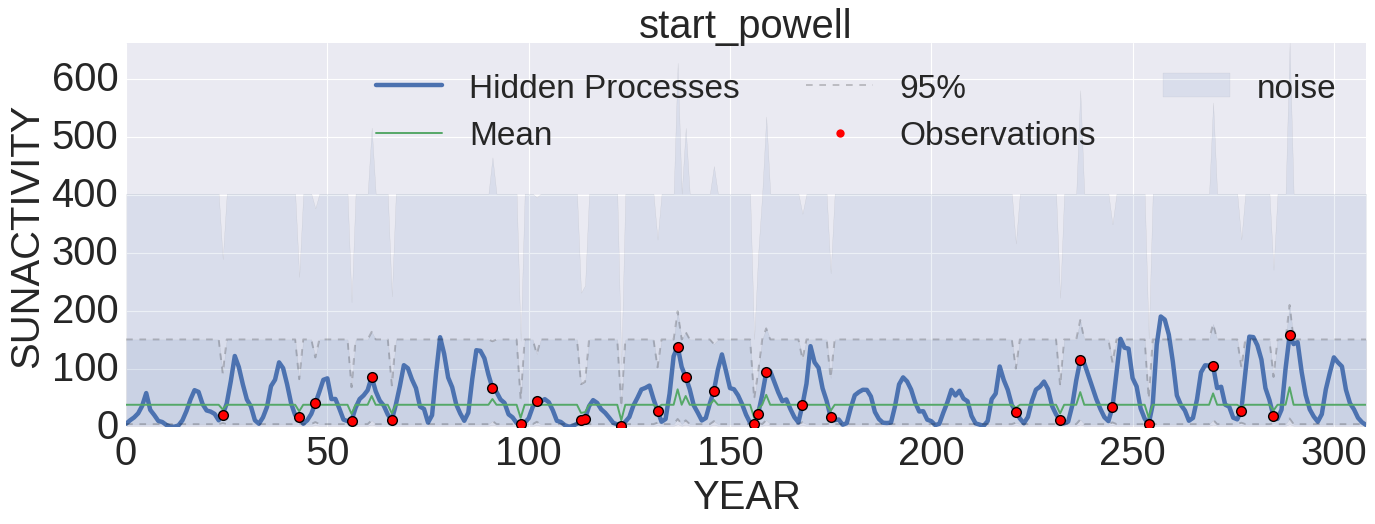

'find_MAP'
{'WTP_ArcsinhLinear_scale_log_': array(2.776158332824707, dtype=float32),
 'WTP_ArcsinhLinear_shift': array(-20.054000854492188, dtype=float32),
 'WTP_Bias_Bias': array(43.35528564453125, dtype=float32),
 'WTP_Freedom_degree_log_': array(1.6162927150726318, dtype=float32),
 'WTP_Noise_var_log_': array(5.626171112060547, dtype=float32),
 'WTP_SE_rate_log_': array([ 32.90604019], dtype=float32),
 'WTP_SE_var_log_': array(5.269472122192383, dtype=float32)}
det_m __str__ = -14.509536743164062
r1 __str__ = -29.960914611816406
r2 __str__ = -7.642301559448242
r3 __str__ = -92.35183715820312


array(-144.46458435058594, dtype=float32)

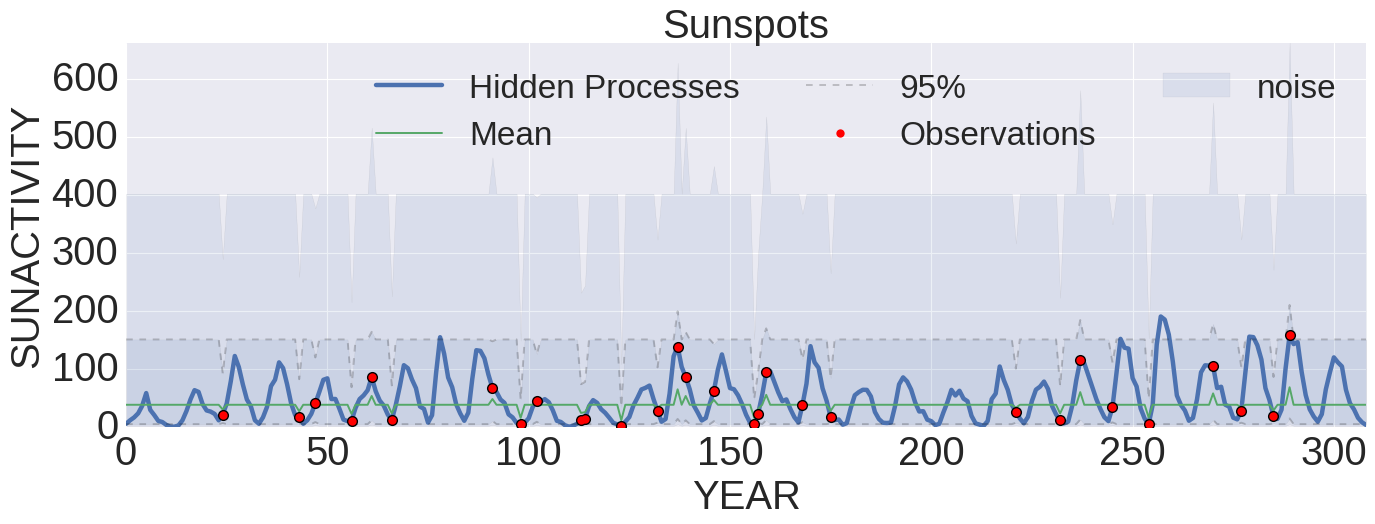

In [93]:
params = tp.find_MAP(start=None, points=2, plot=True)

det_m __str__ = -14.509536743164062
r1 __str__ = -10.177070617675781
r2 __str__ = -27.56815528869629
r3 __str__ = -92.35183715820312


array(-144.60659790039062, dtype=float32)

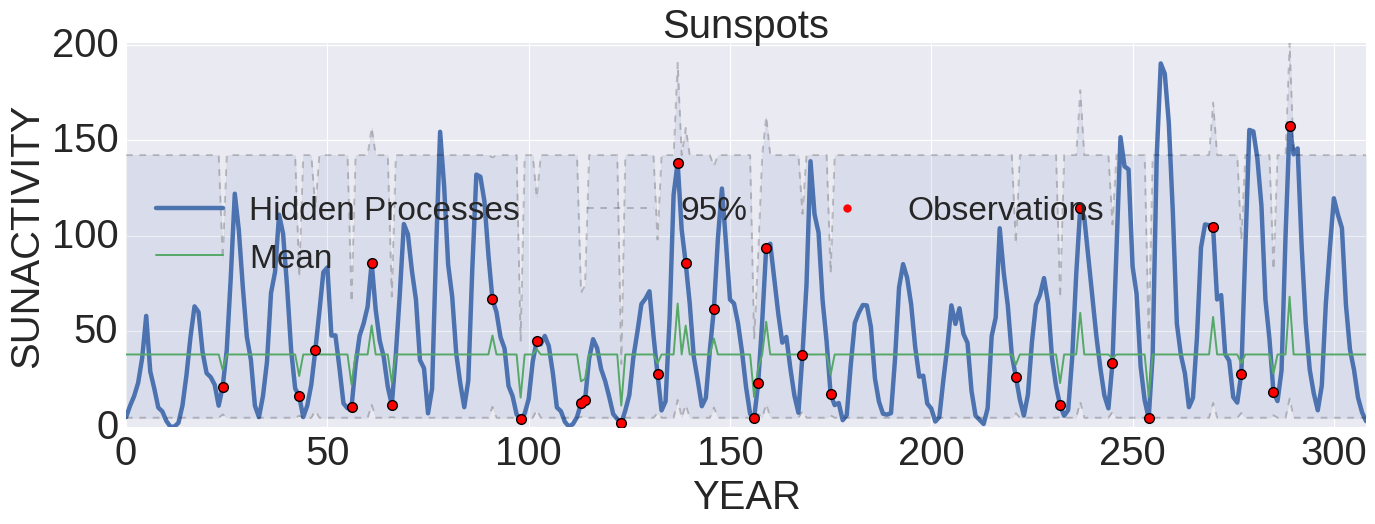

In [124]:
tp.plot(params, samples=0, quantiles_noise=False)
g3.plot_save('images/tp_sunspots1.pdf')
tp.logp(params)

In [101]:
gp.params_process(process=tp, params=params)

{'GP_Bias_Bias': array(43.35528564453125, dtype=float32),
 'GP_Noise_var_log_': array(5.626171112060547, dtype=float32),
 'GP_SE_rate_log_': array([ 32.90604019], dtype=float32),
 'GP_SE_var_log_': array(5.269472122192383, dtype=float32)}

In [102]:
gp.logp(gp.params_process(process=tp, params=params))

array(-176.23095703125, dtype=float32)

In [114]:
params

{'WTP_ArcsinhLinear_scale_log_': array(2.776158332824707, dtype=float32),
 'WTP_ArcsinhLinear_shift': array(-20.054000854492188, dtype=float32),
 'WTP_Bias_Bias': array(43.35528564453125, dtype=float32),
 'WTP_Freedom_degree_log_': array(15.616292953491211, dtype=float32),
 'WTP_Noise_var_log_': array(5.626171112060547, dtype=float32),
 'WTP_SE_rate_log_': array([ 32.90604019], dtype=float32),
 'WTP_SE_var_log_': array(5.269472122192383, dtype=float32)}

In [120]:
params.WTP_Freedom_degree_log_+=2
tp.logp(params)

det_m __str__ = -14.509536743164062
r1 __str__ = -10.177069664001465
r2 __str__ = -27.56815528869629
r3 __str__ = -92.35183715820312


array(-144.60659790039062, dtype=float32)

In [121]:
params.WTP_Freedom_degree_log_-=2
tp.logp(params)

det_m __str__ = -14.509536743164062
r1 __str__ = -10.177070617675781
r2 __str__ = -27.56815528869629
r3 __str__ = -92.35183715820312


array(-144.60659790039062, dtype=float32)